## This file is for the penultimate development of this 4-Level Model

##### TRAINING SUBSECTION

In [1]:
'''NOTE Load in the training data for level-0 models'''

import _Data_Processing
import joblib
from importlib import reload

'''
this function returns 7 objects:
	data: sets of data as X_train, X_val, X_ind, y_train, y_val, y_ind
	feature_list: list of all feature names with a column index (dict)
'''

reload(_Data_Processing)

lstm_format = False

X, X_train, X_val, X_ind,\
y, y_train, y_val, y_ind,\
feature_subsets, scaler =\
_Data_Processing.preprocess_data(
	file_name   =		'spx_full.csv'
	,indp_size  =		0.01
	,test_size  =		0.20
	,shfl_splt	=		False
	,t_start    =		570
	,t_end		=		720
	,mod_type	=		'Area_Classification'
	,target_t	=		55
	,num_class	=		2
	,split_val	=		5
	,verbose	=		1
	,scaler		=		'Standard'
	,frmt_lstm	=		lstm_format
	,keep_price =		True
	,optm_data	=		True
    ,indices	=		0
)
joblib.dump(scaler, 'scaler/tmp.joblib')

Trying to load CSV file into DataFrame...
loaded chunk 1 of size: 125400164 -> 64675164
loaded chunk 2 of size: 125400164 -> 64575164
loaded chunk 3 of size: 125400164 -> 64675164
loaded chunk 4 of size: 125400164 -> 64675164
loaded chunk 5 of size: 125400164 -> 64675164
loaded chunk 6 of size: 125400164 -> 64675164
loaded chunk 7 of size: 125400164 -> 64675164
loaded chunk 8 of size: 125400164 -> 64575164
loaded chunk 9 of size: 125400164 -> 64675164
loaded chunk 10 of size: 7905380 -> 3951196
concat chunks
concatted chunks
Success.
Size of dataset:	586152276
Trying to drop unused targets...Success.
Trying to collect indices of wanted times...Success...

# of Samples:	226576

# of Features:	519

Target:		tc_2a_55m

Trying to split DataFrame into X and y...Success.
Trying to collect all feature names and indices...Success.
Trying to clean up...Success.
Trying to encode y and make class weights...Failed [NON-FATAL: NOT IMPLEMENTED]
Trying to standardize all featurespace from training fe

['scaler/tmp.joblib']

In [2]:
'''NOTE Shred the data to run parallel to desired level-0 structure'''

import _Data_Rotating
from importlib import reload
'''
This function returns 4 items.
-	2D array of X partitions, by featurespace and samplespace
-	1D array of index-lists for each featurespace-partition specific features
-	1D array of featurespace-partition specific rotation transformer functions
-	1D array of y partitions for each samplespace partition.
'''

reload(_Data_Rotating)

X_train_parts, X_find_parts, X_trans_parts, y_parts = _Data_Rotating.rotate_partitions(
	X				=	X_train
	,y				=	y_train
	,n_feat_parts	=	8
	,feat_subsets	=	feature_subsets
	,feat_part_type	=	'by_subset'
	,fraction_feats	=	0.75
	,no_feat_overlap=	False
	,feats_for_all	=	[]
	,rotation_type	=	'PCA'
	,rotation_filter=	False
	,filter_type	=	'Retention'
	,filter_value	=	0.95
	,n_sample_parts	=	1
	,smpl_part_type	=	'Even'
	,sample_overlap	=	0.9
	,sample_shuffle	=	False
	,lstm_format	=	lstm_format
)

2025-02-03 20:10:06.846782: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-03 20:10:06.858200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738631406.869736   85391 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738631406.875473   85391 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-03 20:10:06.887995: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Custom parameters selected.
nn	-	{'optimizer_type': 'Adam', 'optimizer_kwarg': {'learning_rate': 0.0005}, 'time_steps': 5, 'LSTM': False, 'shuffle_train': True, 'epochs': 5, 'rlr_patience': 20, 'architecture': 'default_deep'}


I0000 00:00:1738631408.772751   85391 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1962 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 3GB, pci bus id: 0000:01:00.0, compute capability: 6.1


Running on: GPU

Training model #1
Running on: GPU

Epoch 1/5


I0000 00:00:1738631413.145557   85529 service.cc:148] XLA service 0x7efd880198a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738631413.145622   85529 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 3GB, Compute Capability 6.1
2025-02-03 20:10:13.224589: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738631413.626911   85529 cuda_dnn.cc:529] Loaded cuDNN version 90300


 44/616 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5011 - loss: 0.9195 - precision: 0.5055 - recall: 0.4127

I0000 00:00:1738631417.420470   85529 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


616/616 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5011 - loss: 0.8725 - precision: 0.5022 - recall: 0.4247 - val_accuracy: 0.4696 - val_loss: 0.7220 - val_precision: 0.4826 - val_recall: 0.0791 - learning_rate: 5.0000e-04
Epoch 2/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5029 - loss: 0.7459 - precision: 0.5109 - recall: 0.4547 - val_accuracy: 0.4901 - val_loss: 0.7043 - val_precision: 0.5470 - val_recall: 0.1923 - learning_rate: 5.0000e-04
Epoch 3/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5084 - loss: 0.7155 - precision: 0.5186 - recall: 0.4585 - val_accuracy: 0.4951 - val_loss: 0.6968 - val_precision: 0.5613 - val_recall: 0.1950 - learning_rate: 5.0000e-04
Epoch 4/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5187 - loss: 0.7011 - precision: 0.5318 - recall: 0.4564 - val_accuracy: 0.4839 - val_loss: 0.6962 - val_precision: 0.5819 - val_recall: 0.0756 - learning_rate: 5.0000e-04
Epoch 5/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accurac

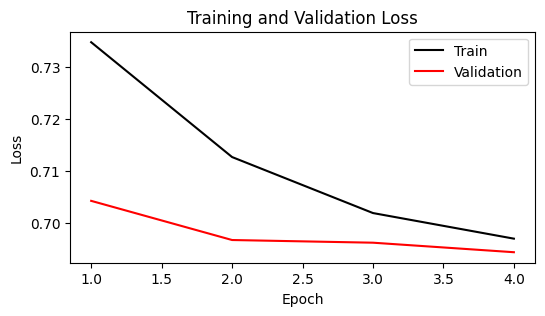

Running on: GPU

Training model #2
Running on: GPU

Epoch 1/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4987 - loss: 0.7758 - precision: 0.5059 - recall: 0.4960 - val_accuracy: 0.5356 - val_loss: 0.6906 - val_precision: 0.5745 - val_recall: 0.4599 - learning_rate: 5.0000e-04
Epoch 2/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4988 - loss: 0.7236 - precision: 0.5081 - recall: 0.4836 - val_accuracy: 0.5193 - val_loss: 0.6911 - val_precision: 0.5598 - val_recall: 0.4147 - learning_rate: 5.0000e-04
Epoch 3/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5132 - loss: 0.7085 - precision: 0.5173 - recall: 0.4258 - val_accuracy: 0.5272 - val_loss: 0.6923 - val_precision: 0.5571 - val_recall: 0.5040 - learning_rate: 5.0000e-04
Epoch 4/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5203 - loss: 0.7012 - precision: 0.5324 - recall: 0.4541 - val_accuracy: 0.5254 - val_loss: 0.6922 - val_precision: 0.5662 - val_recall: 0.4272 - learning_rate: 5.0000e-04

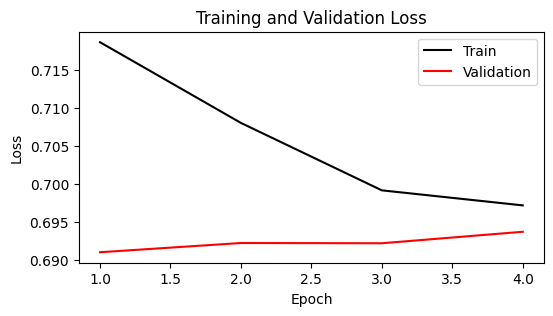

Running on: GPU

Training model #3
Running on: GPU

Epoch 1/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4990 - loss: 0.8493 - precision: 0.4990 - recall: 0.4681 - val_accuracy: 0.4899 - val_loss: 0.7004 - val_precision: 0.5672 - val_recall: 0.1380 - learning_rate: 5.0000e-04
Epoch 2/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4992 - loss: 0.7405 - precision: 0.5059 - recall: 0.4797 - val_accuracy: 0.4907 - val_loss: 0.6941 - val_precision: 0.5611 - val_recall: 0.1570 - learning_rate: 5.0000e-04
Epoch 3/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5055 - loss: 0.7121 - precision: 0.5117 - recall: 0.4715 - val_accuracy: 0.4915 - val_loss: 0.6948 - val_precision: 0.5816 - val_recall: 0.1273 - learning_rate: 5.0000e-04
Epoch 4/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5009 - loss: 0.7081 - precision: 0.5030 - recall: 0.4712 - val_accuracy: 0.4941 - val_loss: 0.6951 - val_precision: 0.5978 - val_recall: 0.1243 - learning_rate: 5.0000e-0

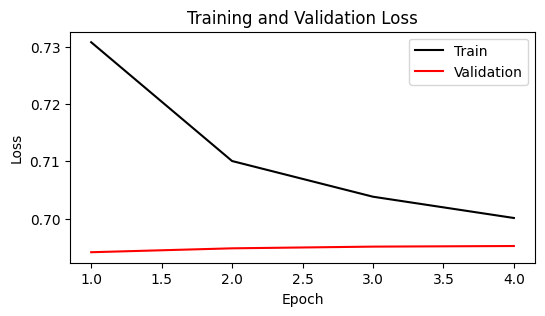

Running on: GPU

Training model #4
Running on: GPU

Epoch 1/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4953 - loss: 0.7783 - precision: 0.4994 - recall: 0.4391 - val_accuracy: 0.4803 - val_loss: 0.7045 - val_precision: 0.5193 - val_recall: 0.1942 - learning_rate: 5.0000e-04
Epoch 2/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4995 - loss: 0.7158 - precision: 0.5063 - recall: 0.4767 - val_accuracy: 0.4909 - val_loss: 0.6962 - val_precision: 0.5340 - val_recall: 0.2714 - learning_rate: 5.0000e-04
Epoch 3/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5052 - loss: 0.7027 - precision: 0.5096 - recall: 0.4718 - val_accuracy: 0.4913 - val_loss: 0.6965 - val_precision: 0.5592 - val_recall: 0.1669 - learning_rate: 5.0000e-04
Epoch 4/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5123 - loss: 0.6974 - precision: 0.5211 - recall: 0.4847 - val_accuracy: 0.4698 - val_loss: 0.6967 - val_precision: 0.4827 - val_recall: 0.0741 - learning_rate: 5.0000e-0

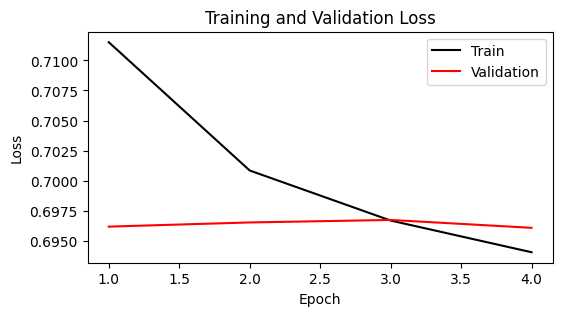

Running on: GPU

Training model #5
Running on: GPU

Epoch 1/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5022 - loss: 0.8332 - precision: 0.5086 - recall: 0.5638 - val_accuracy: 0.4977 - val_loss: 0.7040 - val_precision: 0.5444 - val_recall: 0.2911 - learning_rate: 5.0000e-04
Epoch 2/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5028 - loss: 0.7316 - precision: 0.5065 - recall: 0.5227 - val_accuracy: 0.4895 - val_loss: 0.7058 - val_precision: 0.5521 - val_recall: 0.1691 - learning_rate: 5.0000e-04
Epoch 3/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5053 - loss: 0.7098 - precision: 0.5121 - recall: 0.5385 - val_accuracy: 0.4845 - val_loss: 0.7058 - val_precision: 0.5532 - val_recall: 0.1167 - learning_rate: 5.0000e-04
Epoch 4/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5077 - loss: 0.7023 - precision: 0.5180 - recall: 0.5640 - val_accuracy: 0.4899 - val_loss: 0.7029 - val_precision: 0.5707 - val_recall: 0.1319 - learning_rate: 5.0000e-0

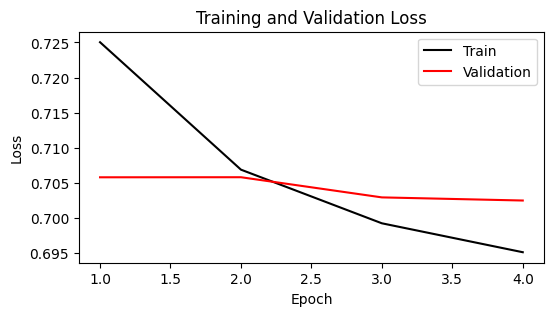

Running on: GPU

Training model #6
Running on: GPU

Epoch 1/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4959 - loss: 0.8717 - precision: 0.5003 - recall: 0.4713 - val_accuracy: 0.4752 - val_loss: 0.7011 - val_precision: 0.5061 - val_recall: 0.2049 - learning_rate: 5.0000e-04
Epoch 2/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5129 - loss: 0.7392 - precision: 0.5211 - recall: 0.5066 - val_accuracy: 0.4837 - val_loss: 0.7003 - val_precision: 0.5160 - val_recall: 0.3379 - learning_rate: 5.0000e-04
Epoch 3/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5058 - loss: 0.7177 - precision: 0.5154 - recall: 0.5011 - val_accuracy: 0.4905 - val_loss: 0.6948 - val_precision: 0.5276 - val_recall: 0.3235 - learning_rate: 5.0000e-04
Epoch 4/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5055 - loss: 0.7051 - precision: 0.5120 - recall: 0.4870 - val_accuracy: 0.4863 - val_loss: 0.7009 - val_precision: 0.5574 - val_recall: 0.1254 - learning_rate: 5.0000e-0

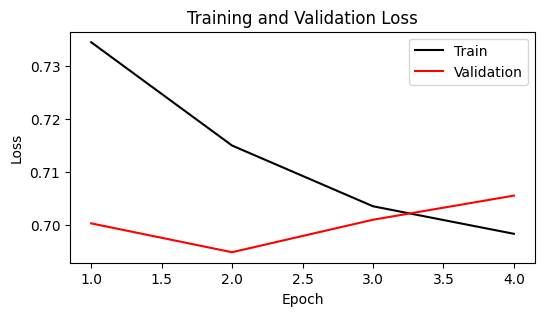

Running on: GPU

Training model #7
Running on: GPU

Epoch 1/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5002 - loss: 0.7905 - precision: 0.5018 - recall: 0.4772 - val_accuracy: 0.5077 - val_loss: 0.6965 - val_precision: 0.5291 - val_recall: 0.6047 - learning_rate: 5.0000e-04
Epoch 2/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5054 - loss: 0.7230 - precision: 0.5127 - recall: 0.5129 - val_accuracy: 0.5189 - val_loss: 0.6933 - val_precision: 0.5551 - val_recall: 0.4424 - learning_rate: 5.0000e-04
Epoch 3/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5019 - loss: 0.7065 - precision: 0.5110 - recall: 0.5059 - val_accuracy: 0.5232 - val_loss: 0.6942 - val_precision: 0.5619 - val_recall: 0.4348 - learning_rate: 5.0000e-04
Epoch 4/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5102 - loss: 0.7003 - precision: 0.5118 - recall: 0.4922 - val_accuracy: 0.5354 - val_loss: 0.6922 - val_precision: 0.5680 - val_recall: 0.4968 - learning_rate: 5.0000e-0

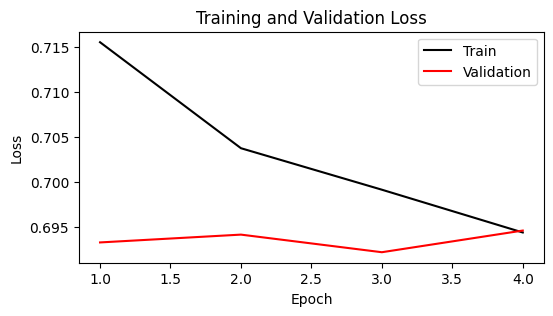

Running on: GPU

Training model #8
Running on: GPU

Epoch 1/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5087 - loss: 0.7670 - precision: 0.5139 - recall: 0.5638 - val_accuracy: 0.5041 - val_loss: 0.6989 - val_precision: 0.5647 - val_recall: 0.2604 - learning_rate: 5.0000e-04
Epoch 2/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5034 - loss: 0.7168 - precision: 0.5008 - recall: 0.5441 - val_accuracy: 0.5087 - val_loss: 0.6966 - val_precision: 0.5375 - val_recall: 0.4907 - learning_rate: 5.0000e-04
Epoch 3/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5046 - loss: 0.7043 - precision: 0.5107 - recall: 0.5617 - val_accuracy: 0.5175 - val_loss: 0.6963 - val_precision: 0.5807 - val_recall: 0.3063 - learning_rate: 5.0000e-04
Epoch 4/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5234 - loss: 0.6946 - precision: 0.5226 - recall: 0.5660 - val_accuracy: 0.4997 - val_loss: 0.7024 - val_precision: 0.5869 - val_recall: 0.1733 - learning_rate: 5.0000e-0

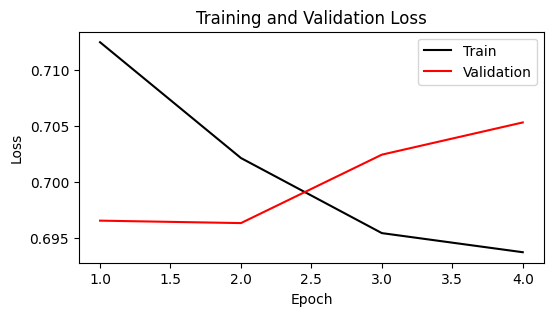

In [3]:
'''NOTE Begin training for each level-0 model'''

import _Modelset_Training
from importlib import reload

'''
Function returns a 3D list of trained models that are fit to the resepective dataset.
	Dim1:	Featurespace, here are the subsetctions/partitions for each unique set of features
	Dim2:	Samplespace, here are the subsetctions/partitions for each unique set of samples
	Dim3:	Modelspace, here are the individual models trained on a unique partition
'''
reload(_Modelset_Training)

models = _Modelset_Training.train_models(
	model_types	=	['nn']
	,data_parts	=	X_train_parts
	,findx_parts=	X_find_parts
	,trans_parts=	X_trans_parts
	,trgt_parts	=	y_parts
	,X_valid	=	X_val
	,y_valid	=	y_val
	,param_mode	=	'custom'
	,cst_mod_prm=	[{
		'optimizer_type'	:	'Adam'
		,'optimizer_kwarg':{
			'learning_rate'	:	0.0005
			#,'momentum'		:	0.9
			}
		,'time_steps'		:	5
		,'LSTM'				:	False
		,'shuffle_train'	:	True
		,'epochs'			:	5
		,'rlr_patience'		:	20
		,'architecture'	:	'default_deep'
		#,'external_cw'	:	_Utility.get_class_weights(y_train)
		}]
	,tnr_verbose=	True
	,lstm_frmt	=	lstm_format
	,use_cls_wt	=	True
)

In [4]:
'''NOTE show performances of level-0 Models'''

import _Model_Evaluation
import _Neural_Net

reload(_Model_Evaluation)
reload(_Neural_Net)

_Model_Evaluation.evaluate_models(
		models=models
		,X_findx=X_find_parts
		,X_trans=X_trans_parts
		,X_train=X_train_parts
		,y_train=y_parts
		,X_test=X_val
		,y_test=y_val
		,prfm_gnrl	=	'all'
		,prfm_stat	=	'all'
		,disp_mthd	=	'as_value'
		,test_whch	=	'independent'
		,pred_type	=	'classification'
		,lstm_frmt	=	lstm_format
)

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Dimensions of Trained Models:
	Feature Space: 8
	Sample Space: 1
	Model Space: 1


	Displaying all performances for all independent samples: (8 cases)

4

Statistics Overall:

	Split 0:
				Avg	St.Dv.	Low	High
		Accuracy	0.51	0.02	0.49	0.54
		Precision	0.57	0.02	0.53	0.6
		Recall		0.29	0.13	0.12	0.5

Statistics By Feature Space:

	Split 0:
				Avg	St.Dv.	Low	High
		Accuracy	0.5	0.0	0.5	0.5
		Precision	0.56	0.0	0.56	0.56
		Recall		0.19	0.0	0.19	0.19
	Split 1:
				Avg	St.Dv.	Low	High
		Accuracy	0.54	0.0	0.54	0.54
		Precision	0.57	0.0	0.57	0.57
		Recall		0.46	0.0	0.46	0.46
	Split 2:
				Avg	St.Dv.	Low	High
		Accuracy	0.49	0.0	0.49	0.49
		Precision	0.6	0.0	0.6	0.6
		R

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(4989, 8)
Running on: GPU

Running on: GPU

Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5248 - loss: 0.7683 - precision: 0.5626 - recall: 0.4371 - val_accuracy: 0.5331 - val_loss: 0.6968 - val_precision: 0.5986 - val_recall: 0.4728 - learning_rate: 0.0010
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5185 - loss: 0.7284 - precision: 0.5534 - recall: 0.4250 - val_accuracy: 0.5471 - val_loss: 0.6923 - val_precision: 0.6029 - val_recall: 0.5308 - learning_rate: 0.0010
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5351 - loss: 0.7095 - precision: 0.5630 - recall: 0.4478 - val_accuracy: 0.5601 - val_loss: 0

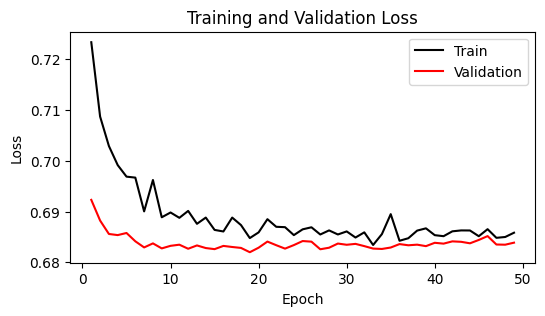

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
META-MODEL SELF TEST:
	Accuracy:	0.55
	Precision:	0.58
	Recall:		0.47


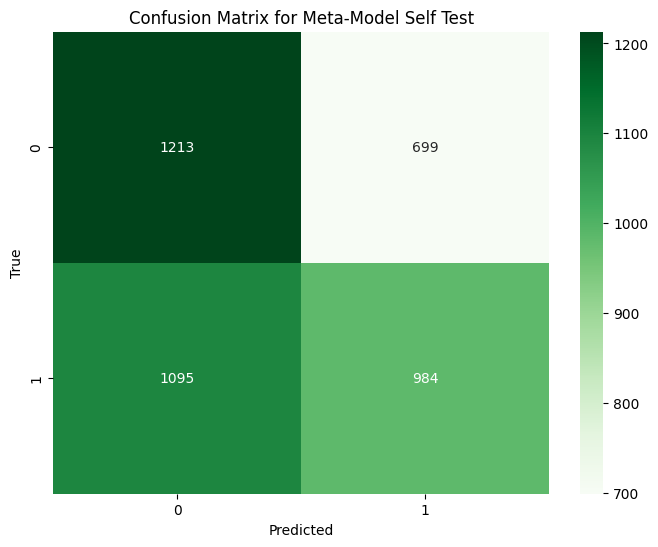

META-MODEL INDEPENDENT TEST:
	Accuracy:	0.58
	Precision:	0.66
	Recall:		0.51


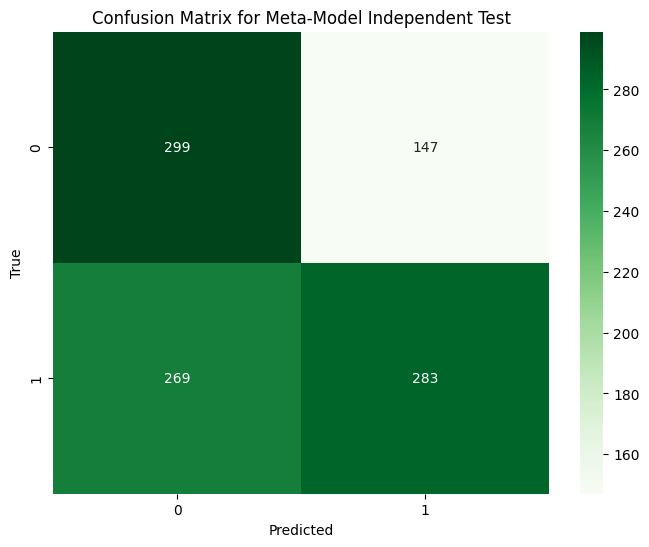

In [5]:
'''NOTE begin training for level-1 model based off of train level-0 model predictions'''

import _Metamodel
from importlib import reload
import _Utility

reload(_Metamodel)
metamodel, prediction_set = _Metamodel.train_test_meta_model(
	models		=	models
	,X_findx	=	X_find_parts
	,X_trans	=	X_trans_parts
	,X_test		=	X_val
	,y_test		=	y_val
	,val_size	=	0.2
	,shuffle	=	True
	,metam_type =	'NN'
	,use_cls_wt =	True
	,use_mm_params=	True
	,metam_params={
		'optimizer_type':	'Adam'
		,'optimizer_kwarg':{
			'learning_rate'	:	0.001
			#,'momentum':0.9
			}
		,'time_steps'		:	5
		,'LSTM'				:	False
		,'shuffle_train'	:	True
		,'epochs'			:	50
		,'batch_size'		:	30
		,'rlr_patience'		:	10
		,'architecture'	:	'default_deep'
		#,'custom_val_data'	:	(X_train, y_train)
		}
)

In [11]:
'''NOTE load in data for testing quality of level-1/2 models'''

import _Data_Processing
from importlib import reload
reload(_Data_Processing)
lstm_format = False
X_test, _, _, __,\
y_test, _, ___, ____,\
feature_subsets, scaler =\
_Data_Processing.preprocess_data(
	file_name   =		'spx_test.csv'
	,indp_size  =		0.01
	,test_size  =		0.01
	,shfl_splt	=		False
	,t_start    =		645
	,t_end		=		800
	,mod_type	=		'Area_Classification'
	,target_t	=		55
	,num_class	=		2
	,split_val	=		5
	,verbose	=		1
	,scaler		=		'Custom'
    ,cstm_scale	=		joblib.load('scaler/tmp.joblib')
	,frmt_lstm	=		lstm_format
	,keep_price =		True
    ,indices	=		0
)

Trying to load CSV file into DataFrame...
loaded chunk 1 of size: 125400164 -> 64600164
loaded chunk 2 of size: 18408884 -> 9395364
concat chunks
concatted chunks
Success.
Size of dataset:	74083444
Trying to drop unused targets...Success.
Trying to collect indices of wanted times...Success...

# of Samples:	28670

# of Features:	519

Target:		tc_2a_55m

Trying to split DataFrame into X and y...Success.
Trying to collect all feature names and indices...Success.
Trying to clean up...Success.
Trying to encode y and make class weights...Failed [NON-FATAL: NOT IMPLEMENTED]
Trying to standardize all featurespace from training featurespace...Success.
Trying to drop unwanted time-range samples...Success.
	25577 Samples Dropped.

Trying to split X and y into Train/Validation/Independent...Success.
Trying to clean up...Success.
X_train:	(3031, 519).
y_train:	(3031,).
X_val:  	(31, 519).
y_val:  	(31,).
X_ind:  	(31, 519).
y_ind:  	(31,).
Terminating.


780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
(24943, 8)
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


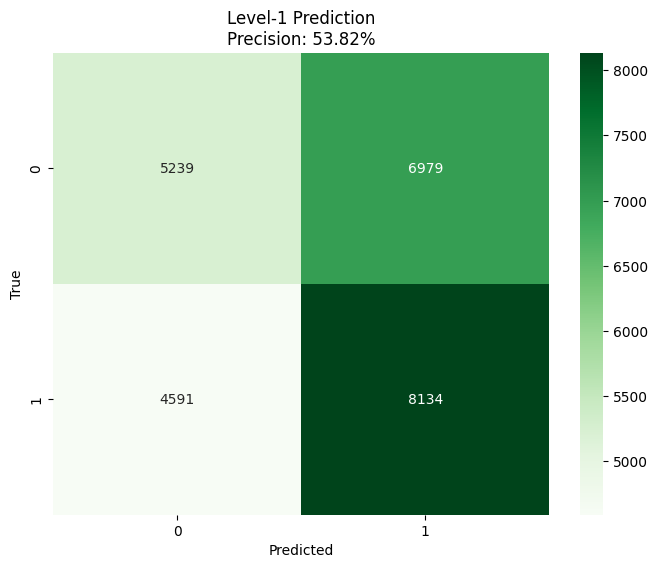

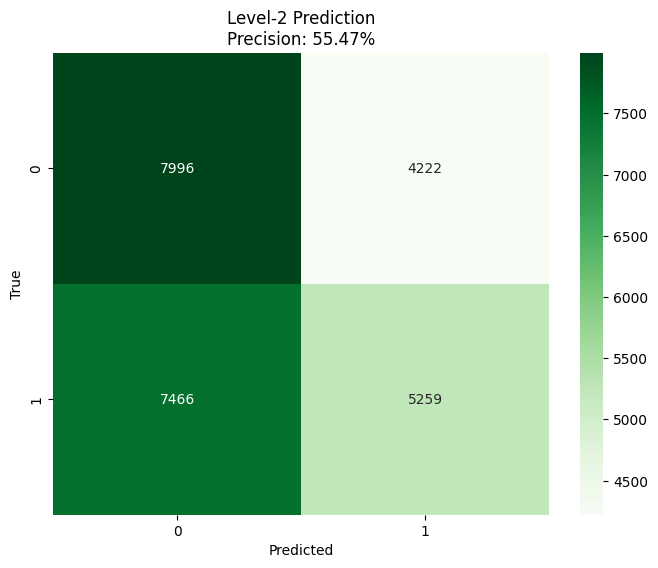

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import _Master_Model
reload(_Master_Model)
reload(_Utility)
from importlib import reload
from sklearn.svm import SVC
from _Utility import get_class_weights

shallow_master = _Master_Model.Master(
	model_depth		=	2
	,all_models 	=	[models, metamodel]
	,lvl0_formatters=	[X_find_parts, X_trans_parts]
)

pred_2 = shallow_master.master_predict(X)
cm_vals = _Utility.get_cm_values(y, pred_2)

_Utility.show_confusion_matrix(y,pred_2,title=f'Level-1 Prediction\nPrecision: {round(precision_score(y,pred_2)*100, 2)}%')

df = pd.DataFrame(X)
df['score'] = cm_vals
df['target'] = y
kept_indices = df.index[~(df['score'] % 2 == 0)].tolist()
df = df.drop(df[df['score']%2==0].index).reset_index(drop=True)
df = df.drop(columns=['score']).reset_index(drop=True)
#pd.set_option('display.max_rows',None)
co = df.corr()['target'].drop('target')
#print(co.sort_values())
p = co.nlargest(5).index.tolist()
n = co.nsmallest(5).index.tolist()
feats = p+n

df_pair = pd.DataFrame(X)
df_pair = df_pair.iloc[kept_indices].reset_index(drop=True)
df_pair = df_pair.iloc[:, feats]

X_svm = df_pair.values
y_svm = df['target'].values

clf = SVC(kernel='linear',C=1.0,class_weight=_Utility.get_class_weights(df['target'])).fit(X_svm, y_svm)

y_svmpred = pred_2#clf.predict(X_svm)
#'polishing' predictions based on if level-1 predicted (1)
for p in range(len(y_svmpred)):
	if(y_svmpred[p] == 1):
		y_svmpred[p] = clf.predict(X[p,feats].reshape(1, -1))

#_Utility.show_confusion_matrix(df['target'],y_svmpred,title=f'Level-2 Prediction\nPrecision: {round(precision_score(y_svm, y_svmpred)*100, 2)}%')
_Utility.show_confusion_matrix(y,y_svmpred,title=f'Level-2 Prediction\nPrecision: {round(precision_score(y, y_svmpred)*100, 2)}%')


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(3093, 8)
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


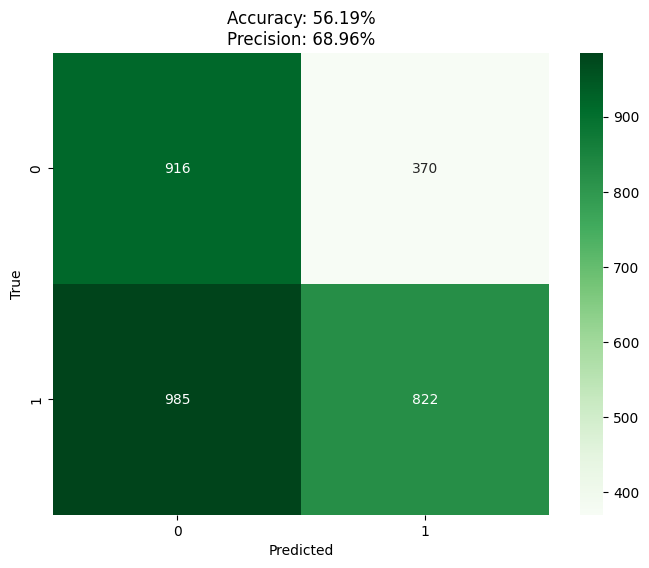

In [13]:
reload(_Master_Model)
reload(_Utility)
deep_master = _Master_Model.Master(
	model_depth		=	3
	,all_models 	=	[models, metamodel.model, clf]
	,lvl0_formatters=	[X_find_parts, X_trans_parts]
    ,lvl2_formatters=	[feats]
)

y_3pred = deep_master.master_predict(X_test)

_Utility.show_confusion_matrix(y_test, y_3pred, title=f'Accuracy: {_Utility.get_accuracy(y_test, y_3pred)}\nPrecision: {_Utility.get_precision(y_test, y_3pred)}')

In [14]:
import _Master_Model
from importlib import reload
reload(_Master_Model)
#deep_master = _Master_Model.Master(model_depth=3)
#deep_master.load_model('pre63p2-645-800')
deep_master.save_model()

Folder tree generated successfully.
PATH: tmp_model/level_0/model_0_0_0
keras saving complete
PATH: tmp_model/level_0/model_1_0_0
keras saving complete
PATH: tmp_model/level_0/model_2_0_0
keras saving complete
PATH: tmp_model/level_0/model_3_0_0
keras saving complete
PATH: tmp_model/level_0/model_4_0_0
keras saving complete
PATH: tmp_model/level_0/model_5_0_0
keras saving complete
PATH: tmp_model/level_0/model_6_0_0
keras saving complete
PATH: tmp_model/level_0/model_7_0_0
keras saving complete
helloooo


loaded chunk 1 of size: 125400164 -> 64600164
loaded chunk 2 of size: 18408884 -> 9395364
concat chunks
concatted chunks
Success.
Size of dataset:	74083444
	25577 Samples Dropped.

Chronos: Predicting on Model #1 (pre63p2-645-800)
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(3093, 8)
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Chronos: Predicting on Model #2 (models/m55)
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
(3093, 8)
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Ch

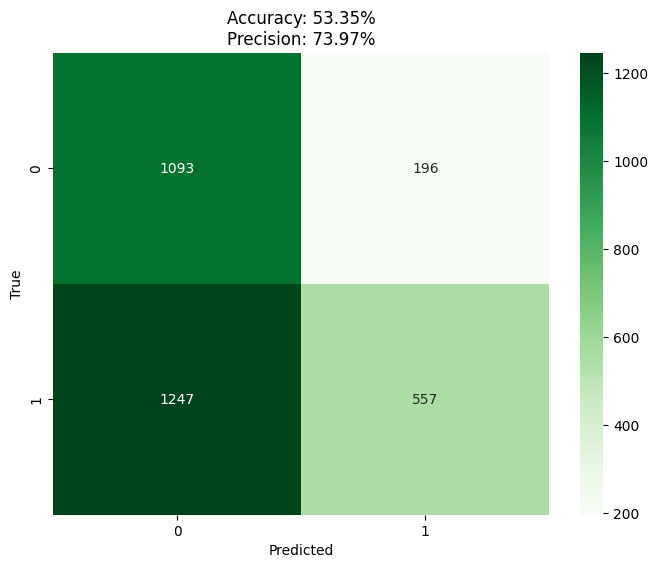

In [16]:
import _Time_Ensemble
import _Master_Model
import joblib
import _Utility

'''NOTE load in data for testing quality of level-1/2 models'''

import _Data_Processing
from importlib import reload
reload(_Data_Processing)
reload(_Master_Model)
reload(_Time_Ensemble)
lstm_format = False
X_te, _, _, __,\
y_te, _, ___, ____,\
feature_subsets, scaler =\
_Data_Processing.preprocess_data(
	file_name   =		'spx_test.csv'
	,indp_size  =		0.01
	,test_size  =		0.01
	,shfl_splt	=		False
	,t_start    =		645
	,t_end		=		800
	,mod_type	=		'Area_Classification'
	,target_t	=		60
	,num_class	=		2
	,split_val	=		5
	,verbose	=		0
	,scaler		=		'Custom'
    ,cstm_scale	=		joblib.load('scaler/tmp.joblib')
	,frmt_lstm	=		lstm_format
	,keep_price =		True
    ,indices	=		0
)

t_pred = _Time_Ensemble.chronos_predict(X_te, ['pre63p2-645-800','models/m55','models/m60'], fusion_method='mv',vote_var=3)
_Utility.show_confusion_matrix(y_te, t_pred, title=f'Accuracy: {_Utility.get_accuracy(y_te, t_pred)}\nPrecision: {_Utility.get_precision(y_te, t_pred)}')